In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc,plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import KMeansSMOTE,BorderlineSMOTE
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
random_seed = 42
np.random.seed(random_seed)

In [2]:
data = pd.read_csv('train_eda.csv')
data.drop(['TransactionID','TransactionDT'],axis = 1 , inplace=True)
data.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_37,id_38,DeviceType,DeviceInfo,OS_id_30,version_id_30,screen_width,screen_height,DeviceCorp,hour_warning
0,0,68.5,W,13926,143.0,150.0,discover,240.0,credit,315.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
1,0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
2,0,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
3,0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,-1,-1,NAN,lowwarningsign
4,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,T,T,mobile,Samsung,Android,7.0,2220,1080,SAMSUNG,lowwarningsign


In [3]:
object_data = data.select_dtypes(include = 'object')
object_columns = object_data.columns.values

lb = LabelEncoder()
data[object_columns] = data[object_columns].apply(lambda col : lb.fit_transform(col))

X = data.drop(['isFraud'],axis = 1).values
y = data['isFraud'].values


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify=y)

## UnderSampling


In [5]:
rus = RandomUnderSampler(random_state=42)
X_under,y_under = rus.fit_resample(X_train,y_train)

In [6]:
lgb_under = LGBMClassifier()
lgb_under.fit(X_under,y_under)

[LightGBM] [Info] Number of positive: 14050, number of negative: 14050
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13598
[LightGBM] [Info] Number of data points in the train set: 28100, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [7]:
yunder_pred = lgb_under.predict(X_test)
print(classification_report(y_test,yunder_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    130962
           1       0.19      0.81      0.31      4683

    accuracy                           0.87    135645
   macro avg       0.59      0.84      0.62    135645
weighted avg       0.96      0.87      0.91    135645



C:\Users\Admin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


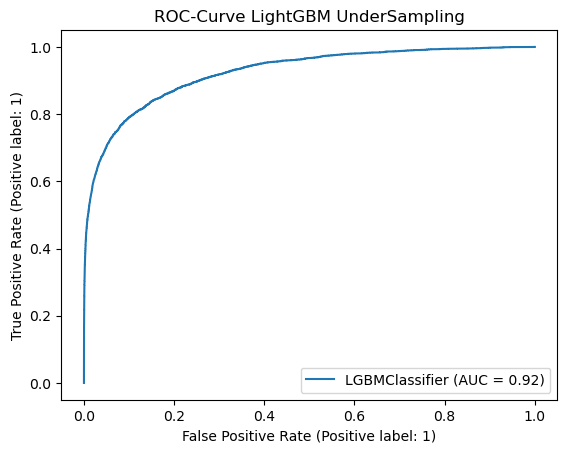

In [8]:
plot_roc_curve(lgb_under,X_test,y_test)
plt.title("ROC-Curve LightGBM UnderSampling")
plt.show()

## NoSample


In [9]:
lgb = LGBMClassifier(

)
lgb.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 14050, number of negative: 392885
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15616
[LightGBM] [Info] Number of data points in the train set: 406935, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034526 -> initscore=-3.330895
[LightGBM] [Info] Start training from score -3.330895


LGBMClassifier()

In [10]:
y_pred = lgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    130962
           1       0.87      0.44      0.58      4683

    accuracy                           0.98    135645
   macro avg       0.92      0.72      0.79    135645
weighted avg       0.98      0.98      0.97    135645



C:\Users\Admin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


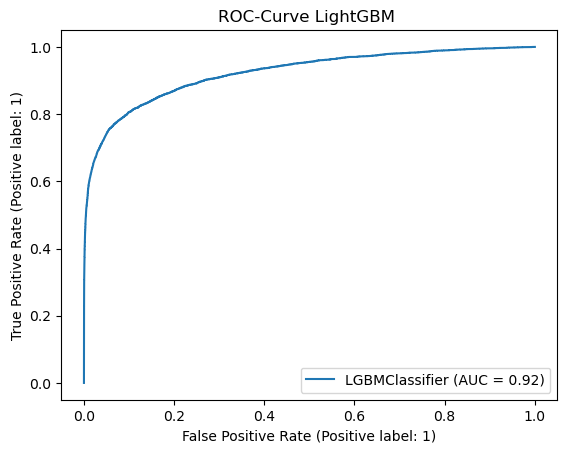

In [11]:
plot_roc_curve(lgb,X_test,y_test)
plt.title("ROC-Curve LightGBM ")
plt.show()

## SMOTE

In [12]:
kms = BorderlineSMOTE()
X_upper,y_upper = kms.fit_resample(X_train,y_train)

In [13]:
lgb_upper = LGBMClassifier(

)

lgb_upper.fit(X_upper,y_upper)

[LightGBM] [Info] Number of positive: 392885, number of negative: 392885
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48914
[LightGBM] [Info] Number of data points in the train set: 785770, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [14]:
yupper_pred = lgb_upper.predict(X_test)
print(classification_report(y_test,yupper_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    130962
           1       0.79      0.40      0.53      4683

    accuracy                           0.98    135645
   macro avg       0.88      0.70      0.76    135645
weighted avg       0.97      0.98      0.97    135645



C:\Users\Admin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC-SMOTE LightGBM SMOTE')

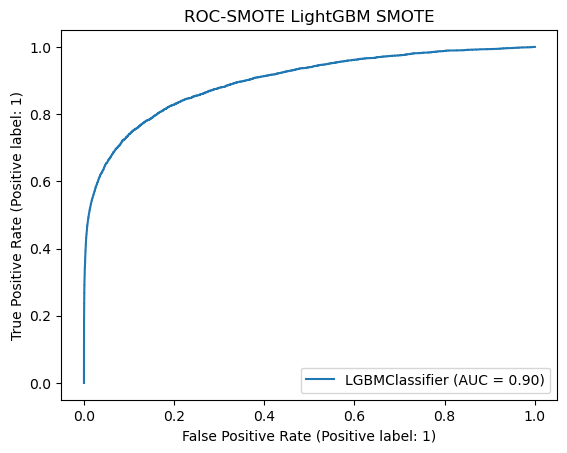

In [15]:
plot_roc_curve(lgb_upper,X_test,y_test)
plt.title("ROC-SMOTE LightGBM SMOTE")

## Feature Importance(NoSample)

In [16]:
importaces = lgb.feature_importances_
columns = data.drop(['isFraud'],axis = 1).columns.values
importaces.shape

(196,)

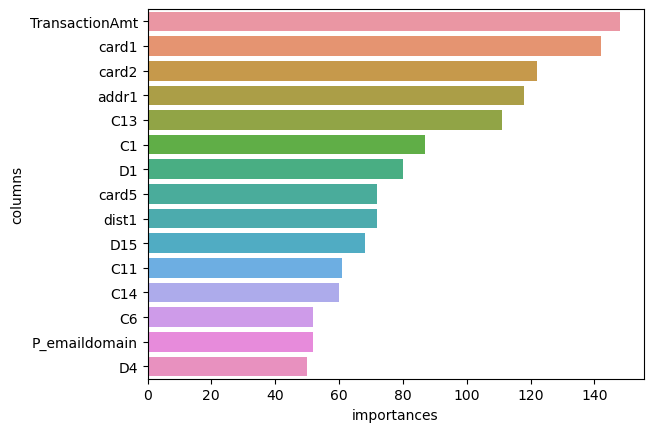

In [17]:
feature_importance = pd.DataFrame({
    'importances' : importaces,
    'columns' : columns
})

feature_importance.sort_values(by = 'importances',inplace=True,ascending=False)
tmp = feature_importance.iloc[:15,:]

sns.barplot(x='importances', y='columns', data=tmp, orient='h')
plt.show()

## Tuning With Nosample data

In [18]:
!pip install hyperopt

In [22]:
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from hyperopt.pyll.stochastic import sample
import gc #garbage collection
#optional but advised
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb

NUM_EVALS = 
N_FOLDS = 5 

#LIGHTGBM PARAMETERS
LGBM_MAX_LEAVES = 2**9 
LGBM_MAX_DEPTH = 25 
EVAL_METRIC_LGBM_REG = 'mae' 
EVAL_METRIC_LGBM_CLASS = 'auc'

def quick_hyperopt(data, labels, num_evals=NUM_EVALS,cat_features = None):
    
    print('Running {} rounds of LightGBM parameter optimisation:'.format(num_evals))
    gc.collect()

    integer_params = ['max_depth',
                     'num_leaves',
                      'max_bin',
                     'min_data_in_leaf',
                     'min_data_in_bin']

    def objective(space_params):

        for param in integer_params:
            space_params[param] = int(space_params[param])

        if space_params['boosting_type']['boosting_type'] == 'goss':
            top_rate = space_params['boosting_type'].get('top_rate')
            other_rate = space_params['boosting_type'].get('other_rate')
            top_rate = max(top_rate, 0)
            top_rate = min(top_rate, 0.5)
            other_rate = max(other_rate, 0)
            other_rate = min(other_rate, 0.5)
            space_params['top_rate'] = top_rate
            space_params['other_rate'] = other_rate
            
        if cat_features is not None:
            train = lgb.Dataset(data, labels, categorical_feature=cat_features)
        else:
             train = lgb.Dataset(data, labels)
                
        subsample = space_params['boosting_type'].get('subsample', 1.0)
        space_params['boosting_type'] = space_params['boosting_type']['boosting_type']
        space_params['subsample'] = subsample

        cv_results = lgb.cv(space_params, train, nfold = N_FOLDS, stratified=True,
                   metrics=EVAL_METRIC_LGBM_CLASS, seed=42)
        best_loss = 1 - cv_results['valid auc-mean'][-1]


        return{'loss':best_loss, 'status': STATUS_OK }



    boosting_list = [{'boosting_type': 'gbdt',
                      'subsample': hp.uniform('subsample', 0.5, 1)},
                     {'boosting_type': 'goss',
                      'subsample': 1.0,
                     'top_rate': hp.uniform('top_rate', 0, 0.5),
                     'other_rate': hp.uniform('other_rate', 0, 0.5)}] 

    metric_list = ['auc']
    objective_list = ['binary', 'cross_entropy']


    space ={'boosting_type' : hp.choice('boosting_type', boosting_list),
            'num_leaves' : hp.quniform('num_leaves', 2, LGBM_MAX_LEAVES, 1),
            'max_depth': hp.quniform('max_depth', 2, LGBM_MAX_DEPTH, 1),
            'max_bin': hp.quniform('max_bin', 32, 255, 1),
            'min_data_in_leaf': hp.quniform('min_data_in_leaf', 1, 256, 1),
            'min_data_in_bin': hp.quniform('min_data_in_bin', 1, 256, 1),
            'min_gain_to_split' : hp.quniform('min_gain_to_split', 0.1, 5, 0.01),
            'lambda_l1' : hp.uniform('lambda_l1', 0, 5),
            'lambda_l2' : hp.uniform('lambda_l2', 0, 5),
            'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
            'metric' : hp.choice('metric', metric_list),
            'objective' : hp.choice('objective', objective_list),
            'feature_fraction' : hp.quniform('feature_fraction', 0.5, 1, 0.01),
            'bagging_fraction' : hp.quniform('bagging_fraction', 0.5, 1, 0.01)
        }

    trials = Trials()
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=num_evals, 
                trials=trials)

    #fmin() will return the index of values chosen from the lists/arrays in 'space'
    #to obtain actual values, index values are used to subset the original lists/arrays
    best['boosting'] = boosting_list[best['boosting_type']]['boosting_type']#nested dict, index twice
    best['metric'] = metric_list[best['metric']]
    best['objective'] = objective_list[best['objective']]

    #cast floats of integer params to int
    for param in integer_params:
        best[param] = int(best[param])

    print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
    return(best)    

In [27]:
train = data.drop(['isFraud'],axis = 1)
y = data['isFraud'].values

train2 = pd.DataFrame(X_train,columns = train.columns)

In [28]:
best = quick_hyperopt(train2,y_train,5)

Running 5 rounds of LightGBM parameter optimisation:
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strate

[LightGBM] [Info] Number of positive: 11240, number of negative: 314308                                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069090 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5521                                                                                             
[LightGBM] [Info] Number of data points in the train set: 325548, number of used features: 194                                
[LightGBM] [Info] Using GOSS                                                                                                  
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071715 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7339                                      

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.9500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9500000000000001
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.9500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9500000000000001
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057830 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9959                                                                                             
[LightGBM] [Info] Number of data points in the train set: 325548, number of used features: 195                                
[LightGBM] [Warning] bagging_fraction is set=0.5700000000000001, subsample=0.9376409286320173 will be ignored. Current value: bagging_fraction=0.5700000000000001
[LightGBM] [Warning] bagging_fraction is set=0.5700000000000001, subsample=0.9376409286320173 will be ignored. Current value: bagging_fraction=0.5700000000000001
[LightGBM] [Warning] bagging_fraction is set=0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] bagging_fraction is set=0.59, subsample=1.0 will be ignored. Current value: bagging_fraction=0.59        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.59, subsample=1.0 will be ignored. Current value: bagging_fraction=0.59        
[LightGBM] [Warning] Foun

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.59, subsample=1.0 will be ignored. Current value: bagging_fraction=0.59        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 11240, number of negative: 314308                                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058531 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4780                                      

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

In [29]:
train_nosample = pd.DataFrame(X_train,columns = train.columns)
y_nosample = y_train
train_nosample = lgb.Dataset(train_nosample,y_nosample)

lgb_tuned_nosample = lgb.train(best,train_nosample)

[LightGBM] [Warning] boosting is set=goss, boosting_type=1 will be ignored. Current value: boosting=goss
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] boosting is set=goss, boosting_type=1 will be ignored. Current value: boosting=goss
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7339
[LightGBM] [I

In [31]:
ytuned_pred = lgb_tuned_nosample.predict(X_test)
# print(classification_report(y_test,ytuned_pred))
print("AUC After Finetuning In NoSample Dataset:",roc_auc_score(y_test,ytuned_pred))

AUC After Finetuning In NoSample Dataset: 0.9365353702857074


In [32]:
tmp = [0 if x  < 0.5 else 1 for x in ytuned_pred]

print(classification_report(y_test,tmp))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    130962
           1       0.89      0.47      0.62      4683

    accuracy                           0.98    135645
   macro avg       0.94      0.74      0.80    135645
weighted avg       0.98      0.98      0.98    135645



## Tunning with undersampling data

In [33]:
train_undersample = pd.DataFrame(X_under,columns = train.columns)

best_under = quick_hyperopt(train_undersample,y_under,5)

Running 5 rounds of LightGBM parameter optimisation:
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=0.8311811992500711 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=0.8311811992500711 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=0.8311811992500711 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005036 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4956                                                                                             
[LightGBM] [Info] Number of data points in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements                       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] bagging_fraction is set=0.68, subsample=1.0 will be ignored. Current value: bagging_fraction=0.68        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.68, subsample=1.0 will be ignored. Current value: bagging_fraction=0.68        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 11240, number of negative: 11240                                                        
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005834 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=1.0 will be ignored. Current value: bagging_fraction=0.79        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 11240, number of negative: 11240                                                        
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014125 seconds.                    
You can set `force_col_wise=true` to remove the overhead.
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.72, subsample=1.0 will be ignored. Current value: bagging_fraction=0.72        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.72, subsample=1.0 will be ignored. Current value: bagging_fraction=0.72        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 11240, number of negative: 11240                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

In [34]:

train_undersamleLGB = lgb.Dataset(train_undersample,y_under,)
lgb_tuned_undersample = lgb.train(best_under,train_undersamleLGB)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=0 will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=0.8311811992500711 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=0 will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=0.8311811992500711 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4956
[LightGBM] [Info] Number of data points in the train set: 28100, number of used features: 192
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.500000 -> initscor

In [35]:
yunder_pred = lgb_tuned_undersample.predict(X_test)
# print(classification_report(y_test,ytuned_pred))
print("AUC After Finetuning In UnderSample Dataset:",roc_auc_score(y_test,yunder_pred))

AUC After Finetuning In UnderSample Dataset: 0.907981404923985


In [36]:
tmp2 = [0 if x  < 0.5 else 1 for x in yunder_pred]

print(classification_report(y_test,tmp2))


              precision    recall  f1-score   support

           0       0.99      0.87      0.92    130962
           1       0.17      0.79      0.29      4683

    accuracy                           0.86    135645
   macro avg       0.58      0.83      0.61    135645
weighted avg       0.96      0.86      0.90    135645



## Tuning with SMOTE 

In [37]:
train_uppersample = pd.DataFrame(X_upper,columns = train.columns)

best_upper = quick_hyperopt(train_uppersample,y_upper,5)

Running 5 rounds of LightGBM parameter optimisation:
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=0.7314842390826723 will be ignored. Current value: bagging_fraction=0.79
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=0.7314842390826723 will be ignored. Current value: bagging_fraction=0.79
[LightGBM] [Warning] bagging_fraction is set=0.79, subsample=0.7314842390826723 will be ignored. Current value: bagging_fraction=0.79
[LightGBM] [Info] Number of positive: 314308, number of negative: 314308                                                      
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.387639 seconds.                    
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38584                                                                                            
[LightGBM] [Info] Number of data points in the train set: 628616, number of used features: 194            

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.53, subsample=1.0 will be ignored. Current value: bagging_fraction=0.53        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086505 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17639                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] bagging_fraction is set=0.7000000000000001, subsample=0.8267827193911296 will be ignored. Current value: bagging_fraction=0.7000000000000001
[LightGBM] [Info] Number of positive: 314308, number of negative: 314308                                                      
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092873 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17833                                                                                            
[LightGBM] [Info] Number of data points in the train set: 628616, number of used features: 194                                
[LightGBM] [Warning] bagging_fraction is set=0.7000000000000001, subsample=0.8267827193911296 will be ignored. Current value: bagging_fraction=0.7000000000000001
[LightGBM] [Warning] bagging_fraction is set=0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                                    
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                     

[LightGBM] [Warning] bagging_fraction is set=0.58, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.58, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58        
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 314308, number of negative: 314308                                                      
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073423 seconds.                    
You can set `force_row_wise=true` to remove the overhead.
And if m

[LightGBM] [Warning] bagging_fraction is set=0.6900000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6900000000000001
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] bagging_fraction is set=0.6900000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6900000000000001
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check                                       
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074341 seconds.                    
You can set `force_row_wis

In [38]:
train_uppersampleLGB = lgb.Dataset(train_uppersample,y_upper)
lgb_tuned_uppersample = lgb.train(best_upper,train_uppersampleLGB)

[LightGBM] [Warning] boosting is set=goss, boosting_type=1 will be ignored. Current value: boosting=goss
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] boosting is set=goss, boosting_type=1 will be ignored. Current value: boosting=goss
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31929
[LightGBM] [

In [39]:
yupper_pred = lgb_tuned_uppersample.predict(X_test)
# print(classification_report(y_test,ytuned_pred))
print("AUC After Finetuning In Upper Dataset:",roc_auc_score(y_test,yupper_pred))

AUC After Finetuning In Upper Dataset: 0.9073168381666661


In [40]:
tmp3 = [0 if x  < 0.5 else 1 for x in yupper_pred]

print(classification_report(y_test,tmp3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    130962
           1       0.77      0.46      0.58      4683

    accuracy                           0.98    135645
   macro avg       0.88      0.73      0.78    135645
weighted avg       0.97      0.98      0.97    135645

